In [2]:
import xml.etree.ElementTree as ET

words_path = "icdar2003/SceneTrialTrain/words.xml"
tree = ET.parse(words_path)
root = tree.getroot()

img_paths = []
img_sizes = []
img_labels = []
bounding_boxes = []

for img in root:
    bbs_of_image = []
    labels_of_image = []
    img_paths.append(img[0].text)
    img_sizes.append((int(img[1].attrib['x']), int(img[1].attrib['y'])))
    box = img.findall('taggedRectangles')
    for i in box:
        for j in i:
            x = float(j.attrib['x'])
            y = float(j.attrib['y'])
            w = float(j.attrib['width'])
            h = float(j.attrib['height'])
            bbs_of_image.append([x, y, w, h])
            labels_of_image.append(j.find('tag').text.lower())
    img_labels.append(labels_of_image)
    bounding_boxes.append(bbs_of_image)


In [3]:
import os

dataset_dir = "icdar2003/SceneTrialTrain"

words_xml_path = os.path.join(dataset_dir, "words.xml")

print(bounding_boxes)
print(img_sizes)
print(img_labels)


[[[174.0, 392.0, 274.0, 195.0], [512.0, 391.0, 679.0, 183.0], [184.0, 612.0, 622.0, 174.0], [863.0, 599.0, 446.0, 187.0], [72.0, 6.0, 95.0, 87.0], [247.0, 2.0, 197.0, 88.0], [792.0, 0.0, 115.0, 81.0], [200.0, 848.0, 228.0, 139.0], [473.0, 878.0, 165.0, 109.0], [684.0, 878.0, 71.0, 106.0], [806.0, 844.0, 218.0, 141.0]], [[432.0, 635.0, 847.0, 172.0]], [[656.0, 222.0, 502.0, 81.0], [626.0, 253.0, 540.0, 31.0], [709.0, 307.0, 409.0, 69.0], [791.0, 368.0, 265.0, 73.0], [1152.0, 953.0, 57.0, 19.0], [653.0, 1006.0, 63.0, 15.0], [1101.0, 974.0, 111.0, 14.0], [1065.0, 1000.0, 70.0, 16.0], [1138.0, 1000.0, 74.0, 15.0], [1067.0, 1025.0, 145.0, 18.0]], [[682.0, 754.0, 64.0, 43.0], [796.0, 759.0, 61.0, 40.0], [573.0, 541.0, 138.0, 52.0], [743.0, 532.0, 350.0, 61.0], [1141.0, 528.0, 64.0, 75.0], [642.0, 635.0, 103.0, 52.0], [788.0, 625.0, 363.0, 59.0], [730.0, 243.0, 374.0, 77.0], [577.0, 334.0, 644.0, 102.0], [611.0, 458.0, 99.0, 26.0], [714.0, 455.0, 85.0, 27.0], [810.0, 451.0, 54.0, 26.0], [871.

In [4]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.47  Python-3.11.0 torch-2.4.0.dev20240411 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete  (12 CPUs, 15.8 GB RAM, 8.6/48.8 GB disk)


In [5]:
def convert_to_yolov8_format(img_paths, img_sizes, img_bbs):
    yolov8_data = []
    for image_path, image_size, img_bb in zip(img_paths, img_sizes, img_bbs):
        img_width, img_height = image_size
        yolo_v8_labels = []
        for item in img_bb:
            x, y, w, h = item
            x_center = x + w / 2
            y_center = y + h / 2
            x_center /= img_width
            y_center /= img_height
            w /= img_width
            h /= img_height
            class_id = 0
            
            yoylo_v8_label = f"{class_id} {x_center} {y_center} {w} {h}"
            yolo_v8_labels.append(yoylo_v8_label)
    
        yolov8_data.append((image_path, yolo_v8_labels))

    return yolov8_data

In [6]:
class_labels = ["text"]

yolov8_data = convert_to_yolov8_format(img_paths, img_sizes, bounding_boxes)
yolov8_data[0]


('apanar_06.08.2002/IMG_1261.JPG',
 ['0 0.194375 0.40791666666666665 0.17125 0.1625',
  '0 0.5321875 0.40208333333333335 0.424375 0.1525',
  '0 0.309375 0.5825 0.38875 0.145',
  '0 0.67875 0.5770833333333333 0.27875 0.15583333333333332',
  '0 0.0746875 0.04125 0.059375 0.0725',
  '0 0.2159375 0.03833333333333333 0.123125 0.07333333333333333',
  '0 0.5309375 0.03375 0.071875 0.0675',
  '0 0.19625 0.7645833333333333 0.1425 0.11583333333333333',
  '0 0.3471875 0.7770833333333333 0.103125 0.09083333333333334',
  '0 0.4496875 0.7758333333333334 0.044375 0.08833333333333333',
  '0 0.571875 0.7620833333333333 0.13625 0.1175'])

In [7]:
from sklearn.model_selection import train_test_split

seed = 0
val_size = 0.2
test_size = .125
is_shuffle = True

train_data, test_data = train_test_split(yolov8_data, test_size=test_size, random_state=seed, shuffle=is_shuffle)
test_data, val_data = train_test_split(train_data, test_size=val_size, random_state=seed, shuffle=is_shuffle)

print(train_data)

[('lfsosa_12.08.2002/IMG_2549.JPG', ['0 0.4875 0.740625 0.840625 0.2520833333333333']), ('lfsosa_12.08.2002/IMG_2642.JPG', ['0 0.4953125 0.4979166666666667 0.859375 0.25']), ('lfsosa_12.08.2002/IMG_2634.JPG', ['0 0.4875 0.25625 0.88125 0.25416666666666665', '0 0.13203125 0.7302083333333333 0.0578125 0.08125', '0 0.49453125 0.50625 0.8078125 0.12916666666666668', '0 0.39765625 0.70625 0.1765625 0.09166666666666666', '0 0.5421875 0.6916666666666667 0.078125 0.09166666666666666', '0 0.65546875 0.6770833333333334 0.1078125 0.10416666666666667', '0 0.234375 0.7229166666666667 0.10625 0.08333333333333333', '0 0.81875 0.653125 0.18125 0.11458333333333333']), ('lfsosa_12.08.2002/IMG_2591.JPG', ['0 0.47604166666666664 0.41583333333333333 0.13541666666666666 0.10833333333333334', '0 0.340625 0.7933333333333333 0.5854166666666667 0.05333333333333334', '0 0.7916666666666666 0.8891666666666667 0.25416666666666665 0.051666666666666666', '0 0.48020833333333335 0.5516666666666666 0.14375 0.13666666666

In [8]:
import shutil

def save_data(data, src_img_dir, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    
    os.makedirs(os.path.join(save_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(save_dir, "labels"), exist_ok=True)

    for image_path, yolov8_labels in data:
        shutil.copy(os.path.join(src_img_dir, image_path), os.path.join(save_dir, "images"))

        image_name = os.path.basename(image_path)
        image_name = os.path.splitext(image_name)[0]

        with open(os.path.join(save_dir, "labels", f"{image_name}.txt"), "w") as f:
            for label in yolov8_labels:
                f.write(label + "\n")

In [9]:
save_yolo_data_dir = "datasets/yolo_data"
os.makedirs(save_yolo_data_dir, exist_ok=True)

save_train_dir = os.path.join(save_yolo_data_dir, "train")
save_val_dir = os.path.join(save_yolo_data_dir, "val")
save_test_dir = os.path.join(save_yolo_data_dir, "test")

save_data(train_data, dataset_dir, save_train_dir)
save_data(val_data, dataset_dir, save_val_dir)
save_data(test_data, dataset_dir, save_test_dir)

In [10]:
import yaml

data_yaml = {
    'path': 'D:/2023/YOLOv8/datasets/yolo_data',
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'nc': 1,
    'names': class_labels
}

yolo_yaml_path = os.path.join(save_yolo_data_dir, "data.yaml")

with open(yolo_yaml_path, 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

In [11]:
from ultralytics import YOLO
import torch

model = YOLO('yolov8s.yaml').load('yolov8s.pt')


Transferred 355/355 items from pretrained weights


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = model.to(device)

print(device)

cuda


In [13]:
epochs = 20
imgsz = 1024

results = model.train(data=yolo_yaml_path, epochs=epochs, imgsz=imgsz, project='models', name='yolov8/detect/train')



In [14]:
model_path = 'models/yolov8/detect/train7/weights/best.pt'
model = YOLO(model_path)

metrics = model.val(
    project='models',
    name = 'yolov8/detect/val',
)

In [15]:
import cv2 
import json
import matplotlib.pyplot as plt


def visualize_img(img_path, predictions, conf_thres=0.7, font=cv2.FONT_HERSHEY_SIMPLEX):
    img = cv2.imread(img_path)

    h, w = img.shape[:2]
    for pred in predictions:
        conf_score = pred['confidence']

        if(conf_score < conf_thres):
            continue
        bbox = pred['box']
        x_min = int(bbox['x1'])
        y_min = int(bbox['y1'])
        x_max = int(bbox['x2'])
        y_max = int(bbox['y2'])

        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
        text = f"{conf_score:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(text, font, 1, 2)
        cv2.putText(img, text, (x_min, y_min-10), font, 1, (0, 0 ,0), 2)

    return img


175
[{'name': 'text', 'class': 0, 'confidence': 0.58995, 'box': {'x1': 0.02946, 'y1': 589.52008, 'x2': 57.41963, 'y2': 639.76447}}, {'name': 'text', 'class': 0, 'confidence': 0.52838, 'box': {'x1': 194.63638, 'y1': 531.83502, 'x2': 359.7608, 'y2': 573.29657}}, {'name': 'text', 'class': 0, 'confidence': 0.26847, 'box': {'x1': 132.68022, 'y1': 531.44525, 'x2': 358.49487, 'y2': 575.0791}}]
[{'name': 'text', 'class': 0, 'confidence': 0.91705, 'box': {'x1': 488.96686, 'y1': 155.3226, 'x2': 813.3418, 'y2': 261.30487}}, {'name': 'text', 'class': 0, 'confidence': 0.57638, 'box': {'x1': 474.55978, 'y1': 155.98528, 'x2': 1196.56592, 'y2': 264.77151}}, {'name': 'text', 'class': 0, 'confidence': 0.53332, 'box': {'x1': 268.97766, 'y1': 29.41993, 'x2': 327.29822, 'y2': 58.60481}}, {'name': 'text', 'class': 0, 'confidence': 0.48278, 'box': {'x1': 505.13214, 'y1': 441.76306, 'x2': 564.30713, 'y2': 468.52167}}, {'name': 'text', 'class': 0, 'confidence': 0.47735, 'box': {'x1': 296.73111, 'y1': 118.54272

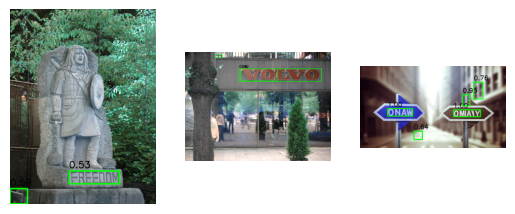

In [16]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

model_path = 'models/yolov8/detect/train7/weights/best.pt'
test_path = "datasets/yolo_data/test/images"

model = YOLO(model_path)

file_paths = []
for item in os.listdir(test_path):
    file_paths.append(os.path.join(test_path, item))

print(len(file_paths))

for i, img_path in enumerate(file_paths[:3], 1):
    res = model(img_path, verbose=False)
    predictions = json.loads(res[0].tojson())
    print(predictions)
    visualized_img = visualize_img(img_path, predictions, conf_thres=0.5)
    plt.subplot(1, 3, i)
    plt.imshow(visualized_img)
    plt.axis('off')

plt.show()

    
    

(-0.5, 1279.5, 959.5, -0.5)

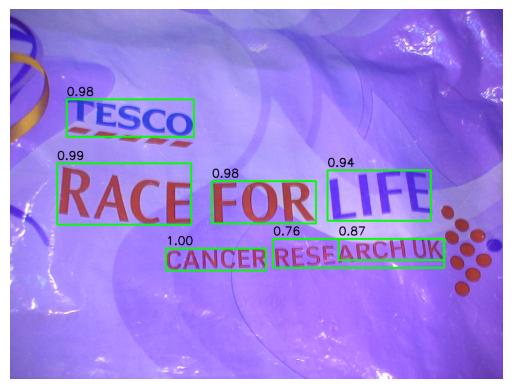

In [17]:
img_path = "datasets/yolo_data/test/images/aPICT0006.jpg"

res = model(img_path, verbose=False)
predictions = json.loads(res[0].tojson())

visualized_img = visualize_img(img_path, predictions, conf_thres=0.7, font=cv2.FONT_HERSHEY_SIMPLEX)
plt.imshow(visualized_img)
plt.axis('off')

code CNN nhận diện text

In [18]:
import torch
from PIL import Image
import os
import numpy as np

def crop_imgs(img_paths, img_labels, bounding_boxes, save_dir):
    img_cropped_paths = []
    img_label_cropped = []
    os.makedirs(save_dir, exist_ok=True)
    count = 0
    labels = []
    for img_path, img_label, bbs in zip(img_paths, img_labels, bounding_boxes):
        img = Image.open(img_path)
        for label, bb in zip(img_label, bbs):
            img_label_cropped.append(label)
            x, y, w, h = bb
            x1 = int(x)
            y1 = int(y)
            x2 = int(x + w)
            y2 = int(y + h)
            crop_img = img.crop((x1, y1, x2, y2))
            # ảnh nhỏ hơn 35 thì nó đen quá hoặc lớn hơn 220 thì quá trắng 
            if np.mean(crop_img) < 35 or np.mean(crop_img) > 220:
                continue
            # xóa những hình ở góc
            if crop_img.size[0] < 10 or crop_img.size[1] < 10:
                continue
            # Xoá những trường hợp ít thông tin đi
            if len(img_label) < 3:
                continue

            crop_img.save(os.path.join(save_dir, f"{count:06d}.jpg"))
            new_img_path = os.path.join(save_dir, f"{count:06d}.jpg")
            img_cropped_paths.append(new_img_path)
            label = new_img_path + '\t' + label
            labels.append(label)
            count += 1
            
    with open (os.path.join(save_dir, "labels.txt"), "w") as f:
        for label in labels:
            f.write(label + "\n")

    return labels, img_cropped_paths

In [19]:
for i in range(len(img_paths)):
    img_paths[i] = os.path.join(dataset_dir, img_paths[i])
print(img_paths)

print(len(img_paths))


['icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1261.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1263.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1265.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1269.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1281.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1282.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1283.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1284.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1285.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1286.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1288.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1289.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1290.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1291.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1292.JPG', 'icdar2003/SceneTrialTrain\\apanar_06.08.2002/IMG_1293.JPG', 'icdar2003/SceneTrialTr

In [20]:
img_label_cropped, img_cropped_paths = crop_imgs(img_paths, img_labels, bounding_boxes, "datasets/cropped_data")


In [21]:
print(img_label_cropped)
print(len(img_label_cropped))
print(len(img_cropped_paths))

['datasets/cropped_data\\000000.jpg\tself', 'datasets/cropped_data\\000001.jpg\tadhesive', 'datasets/cropped_data\\000002.jpg\taddress', 'datasets/cropped_data\\000003.jpg\tlabels', 'datasets/cropped_data\\000004.jpg\t36', 'datasets/cropped_data\\000005.jpg\t250', 'datasets/cropped_data\\000006.jpg\ton', 'datasets/cropped_data\\000007.jpg\ta', 'datasets/cropped_data\\000008.jpg\troll', 'datasets/cropped_data\\000009.jpg\tgreek', 'datasets/cropped_data\\000010.jpg\tgastronomy', 'datasets/cropped_data\\000011.jpg\tcookery', 'datasets/cropped_data\\000012.jpg\twines', 'datasets/cropped_data\\000013.jpg\tlocal', 'datasets/cropped_data\\000014.jpg\ttoubrs', 'datasets/cropped_data\\000015.jpg\tspecialties', 'datasets/cropped_data\\000016.jpg\tfestive', 'datasets/cropped_data\\000017.jpg\trecipes', 'datasets/cropped_data\\000018.jpg\tillustrated', 'datasets/cropped_data\\000019.jpg\t83', 'datasets/cropped_data\\000020.jpg\t73', 'datasets/cropped_data\\000021.jpg\tthe', 'datasets/cropped_data\

In [22]:
string = ""


print(string)
max_label_len = 0
for label in img_labels:
    for item in label:
        if(max_label_len < len(item)):
            max_label_len = len(item)
        for i in item:
            string+=i

string = sorted(set(string))
string += "-"
string = "".join(string)
print(string)


!"&'()-.0123456789:?abcdefghijklmnopqrstuvwxyz£éñ-


In [23]:
import torch.nn.functional as F

char_to_idx = {char: idx + 1 for idx, char in enumerate(string)}
print(char_to_idx)
max_label_len = 14

print(max_label_len)

def encode(label, char_to_idx, max_label_len):
    label_len = len(label)
    encoded_labels = torch.tensor(
        [char_to_idx[char] for char in label],
        dtype=torch.long
    )
    lengths = torch.tensor(label_len, dtype=torch.long)
    padded_labels = F.pad(encoded_labels, (0, max_label_len - label_len), value=0)
    return padded_labels, lengths

{'!': 1, '"': 2, '&': 3, "'": 4, '(': 5, ')': 6, '-': 50, '.': 8, '0': 9, '1': 10, '2': 11, '3': 12, '4': 13, '5': 14, '6': 15, '7': 16, '8': 17, '9': 18, ':': 19, '?': 20, 'a': 21, 'b': 22, 'c': 23, 'd': 24, 'e': 25, 'f': 26, 'g': 27, 'h': 28, 'i': 29, 'j': 30, 'k': 31, 'l': 32, 'm': 33, 'n': 34, 'o': 35, 'p': 36, 'q': 37, 'r': 38, 's': 39, 't': 40, 'u': 41, 'v': 42, 'w': 43, 'x': 44, 'y': 45, 'z': 46, '£': 47, 'é': 48, 'ñ': 49}
14


In [24]:
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

def decode(encoded_sequences, idx_to_char, blank_char='-'):
    decoded_sequences = []
    for seq in encoded_sequences:
        decoded_label = []
        for idx, token in enumerate(seq):
            if token != 0:
                char = idx_to_char[token.item()]
                if char != blank_char:
                    decoded_label.append(char)
        decoded_sequences.append(''.join(decoded_label))
    return decoded_sequences



In [25]:
test = encode("hello", char_to_idx, 14)

decode([test[0]], idx_to_char)

['hello']

In [26]:
from torchvision import transforms

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((100, 420)),
        transforms.ColorJitter(
            brightness=0.5,
            contrast=0.5,
            saturation=0.5,
        ),
        transforms.Grayscale(num_output_channels=1),
        transforms.GaussianBlur(3),
        transforms.RandomAffine(degrees=1, shear=1),
        transforms.RandomPerspective(
            distortion_scale=0.3,
            p=0.5,
            interpolation=3
        ),
        transforms.RandomRotation(degrees=2),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    'val': transforms.Compose([
        transforms.Resize((100, 420)),
        transforms.Grayscale(num_output_channels=1),    
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ])
}

In [27]:
from torch.utils.data import Dataset

class STRDataset(Dataset):
    def __init__(
        self,
        X, y,
        char_to_idx,
        max_label_len,
        label_encoder=None,
        transforms=None
    ):
        self.transforms = transforms
        self.img_paths = X
        self.labels = y
        self.char_to_idx = char_to_idx
        self.max_label_len = max_label_len
        self.label_encoder = label_encoder
    
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert("RGB")
        label = self.labels[idx]

        if self.transforms:
            img = self.transforms(img)

        if self.label_encoder:
            encoded_label, label_len = self.label_encoder(label, self.char_to_idx, self.max_label_len)
            
        return img, encoded_label, label_len

In [28]:
print(img_label_cropped)
for i in range(len(img_label_cropped)):
    img_label_cropped[i] = img_label_cropped[i].split("\t")[1]
print(img_label_cropped)

['datasets/cropped_data\\000000.jpg\tself', 'datasets/cropped_data\\000001.jpg\tadhesive', 'datasets/cropped_data\\000002.jpg\taddress', 'datasets/cropped_data\\000003.jpg\tlabels', 'datasets/cropped_data\\000004.jpg\t36', 'datasets/cropped_data\\000005.jpg\t250', 'datasets/cropped_data\\000006.jpg\ton', 'datasets/cropped_data\\000007.jpg\ta', 'datasets/cropped_data\\000008.jpg\troll', 'datasets/cropped_data\\000009.jpg\tgreek', 'datasets/cropped_data\\000010.jpg\tgastronomy', 'datasets/cropped_data\\000011.jpg\tcookery', 'datasets/cropped_data\\000012.jpg\twines', 'datasets/cropped_data\\000013.jpg\tlocal', 'datasets/cropped_data\\000014.jpg\ttoubrs', 'datasets/cropped_data\\000015.jpg\tspecialties', 'datasets/cropped_data\\000016.jpg\tfestive', 'datasets/cropped_data\\000017.jpg\trecipes', 'datasets/cropped_data\\000018.jpg\tillustrated', 'datasets/cropped_data\\000019.jpg\t83', 'datasets/cropped_data\\000020.jpg\t73', 'datasets/cropped_data\\000021.jpg\tthe', 'datasets/cropped_data\

In [29]:
from sklearn.model_selection import train_test_split

seed = 0
val_size = 0.2
test_size = 0.125
is_shuffle = True


X_train, X_val, y_train, y_val = train_test_split(img_cropped_paths, img_label_cropped, test_size=val_size, random_state=seed, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=seed, shuffle=is_shuffle)

In [30]:
train_dataset = STRDataset(X_train, y_train, char_to_idx, max_label_len, encode, data_transforms['train'])
val_dataset = STRDataset(X_val, y_val, char_to_idx, max_label_len, encode, data_transforms['val'])
test_dataset = STRDataset(X_test, y_test, char_to_idx, max_label_len, encode, data_transforms['val'])


In [31]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

715
205
103


In [32]:
from torch.utils.data import DataLoader
train_batch_size = 16
test_batch_size = 4

train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=test_batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

In [33]:
import torch.nn as nn
import timm

class CRNN(nn.Module):
    def __init__(
            self,
            vocab_size,
            hidden_size,
            n_layers,
            dropout=0.2,
            unfreeze_layers=3
    ):
        super(CRNN, self).__init__()

        backbone = timm.create_model('resnet101', in_chans=1, pretrained=True)
        modules = list(backbone.children())[:-2]
        modules.append(nn.AdaptiveAvgPool2d((1, None)))
        self.backbone = nn.Sequential(*modules)

        for parameter in self.backbone[-unfreeze_layers:].parameters():
            parameter.requires_grad = True
        self.mapSeq = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.lstm = nn.LSTM(
            input_size=512,
            hidden_size=hidden_size,
            num_layers=n_layers,
            bidirectional=True,
            dropout=dropout if n_layers > 1 else 0,
            batch_first=True
        )

        self.layer_norm = nn.LayerNorm(hidden_size * 2)
        self.out = nn.Sequential(
            nn.Linear(hidden_size * 2, vocab_size),
            nn.LogSoftmax(dim=2)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = x.permute(0, 3, 1, 2)
        x = x.view(x.size(0), x.size(1), -1)
        x = self.mapSeq(x)
        x, _ = self.lstm(x)
        x = self.layer_norm(x)
        x = self.out(x)
        x = x.permute(1, 0, 2)

        return x

c:\Users\toanx\miniconda3\envs\study\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
hidden_size = 512
n_layers = 2
dropout = 0.2
unfreeze_layers = 3
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device)
model = CRNN(len(char_to_idx), hidden_size, n_layers, dropout, unfreeze_layers).to(device)


cuda


In [35]:
model.eval()

dummy_tensor = torch.rand(64, 1, 32, 100).to(device)

with torch.no_grad():
    output = model(dummy_tensor)

print(output.shape)

torch.Size([4, 64, 49])


In [36]:
def evaluate(model, data_loader, criterion, device):
    model.eval()
    losses = []
    with torch.no_grad():
        for inputs, labels, labels_len in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels_len = labels_len.to(device)
            outputs = model(inputs)
            logits_lens = torch.full(size=(outputs.size(1),), fill_value=outputs.size(0), dtype=torch.long).to(device)
            loss = criterion(outputs, labels, logits_lens, labels_len)
            losses.append(loss.item())
    loss = sum(losses) / len(losses)
    return loss

In [37]:
def fit(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    n_epochs,
):
    train_losses = []
    val_losses = []
    for epoch in range(n_epochs):
        model.train()
        losses = []
        for inputs, labels, labels_len in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device) 
            labels_len = labels_len.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            logits_lens = torch.full(size=(outputs.size(1),), fill_value=outputs.size(0), dtype=torch.long).to(device)

            loss = criterion(outputs, labels, logits_lens, labels_len)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        train_loss = sum(losses) / len(losses)
        val_loss = evaluate(model, val_loader, criterion, device)
        print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        scheduler.step(val_loss)
    return train_losses, val_losses

In [38]:
print(char_to_idx['-'])

50


In [39]:
epochs = 20
lr = 0.001
weight_decay = 1e-5
scheduler_step_size = epochs*0.4

criterion = nn.CTCLoss(blank=48, zero_infinity=True)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer=optimizer,
    step_size = scheduler_step_size,
    gamma = 0.1
)

train_losses, val_losses = fit(model, train_loader, val_loader, criterion, optimizer, scheduler, device, epochs)

KeyboardInterrupt: 

In [ ]:
save_model_path = "models/oct_crnn_base_best.pt"
torch.save(model.state_dict(), save_model_path)

In [ ]:
model.load_state_dict(torch.load("models/oct_crnn_base_best.pt"))

<All keys matched successfully>

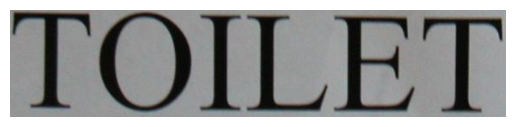

tensor([[[0.0980, 0.1137, 0.1059,  ..., 0.2627, 0.2549, 0.2471],
         [0.1137, 0.0980, 0.0667,  ..., 0.2549, 0.2471, 0.2471],
         [0.1294, 0.0902, 0.0196,  ..., 0.2471, 0.2392, 0.2549],
         ...,
         [0.1922, 0.1843, 0.1843,  ..., 0.2392, 0.2471, 0.2549],
         [0.1765, 0.1686, 0.1686,  ..., 0.2471, 0.2549, 0.2627],
         [0.1686, 0.1608, 0.1608,  ..., 0.2471, 0.2549, 0.2549]]])
tensor([[[ -8.0965,  -6.4027, -11.0615,  -7.1583,  -9.3588,  -5.2654, -10.6249, -11.0877,  -8.6610, -10.6663,  -5.4753,  -6.6613,  -5.3676,  -5.5617,  -7.0102,  -6.4586,  -6.3563,  -5.9347,  -9.0411, -11.1870, -11.5319,  -2.9723,  -3.5819,  -1.7683,  -3.1561,  -4.1924,  -2.9724,  -3.1673,  -3.0540,  -3.6077,  -4.4765,
           -3.8764,  -2.9944,  -3.2137,  -3.9254,  -3.4698,  -2.4931,  -9.4948,  -3.3774,  -4.7222,  -2.7448,  -4.5465,  -4.4527,  -2.4029,  -6.6768,  -5.1924, -12.1157,  -6.1308,  -4.5177]],

        [[ -7.1668,  -7.9762, -12.5680,  -8.9923,  -9.5031,  -8.7349, -10.5128, -

In [ ]:
import torch
from PIL import Image

image_path = "datasets/cropped_data/001018.jpg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()
img_input = data_transforms['val'](image)
print(img_input)

model.eval()
with torch.no_grad():
    output = model(img_input.unsqueeze(0).to(device))

print(output)

In [ ]:
import torch

softmax_output = torch.softmax(output, dim=2)

print(softmax_output)


max_indices = torch.argmax(softmax_output, dim=2)

print(max_indices)

print(idx_to_char[34])
decoded_output = decode(max_indices, idx_to_char)
print(decoded_output)

tensor([[[3.0462e-04, 1.6571e-03, 1.5706e-05, 7.7841e-04, 8.6207e-05, 5.1672e-03, 2.4303e-05, 1.5299e-05, 1.7321e-04, 2.3317e-05, 4.1889e-03, 1.2795e-03, 4.6655e-03, 3.8423e-03, 9.0265e-04, 1.5669e-03, 1.7358e-03, 2.6461e-03, 1.1844e-04, 1.3854e-05, 9.8118e-06, 5.1183e-02, 2.7824e-02, 1.7063e-01, 4.2593e-02,
          1.5109e-02, 5.1182e-02, 4.2117e-02, 4.7172e-02, 2.7115e-02, 1.1373e-02, 2.0726e-02, 5.0066e-02, 4.0206e-02, 1.9735e-02, 3.1125e-02, 8.2652e-02, 7.5244e-05, 3.4137e-02, 8.8960e-03, 6.4258e-02, 1.0604e-02, 1.1647e-02, 9.0451e-02, 1.2598e-03, 5.5586e-03, 5.4730e-06, 2.1748e-03, 1.0914e-02]],

        [[7.7175e-04, 3.4353e-04, 3.4815e-06, 1.2437e-04, 7.4620e-05, 1.6088e-04, 2.7187e-05, 6.8684e-06, 1.9508e-03, 2.1408e-04, 1.8103e-03, 9.8933e-04, 6.0230e-03, 1.4997e-03, 1.7713e-03, 5.5565e-04, 3.4046e-04, 2.4619e-03, 2.9704e-04, 2.7385e-06, 4.1817e-06, 1.7866e-01, 1.0727e-02, 1.1500e-02, 5.5837e-03,
          5.2546e-02, 6.3594e-03, 1.6420e-03, 9.0601e-02, 7.2413e-02, 8.4322e-0

In [ ]:
def predict_class(output, class_labels):
    probabilities = torch.softmax(output, dim=1)  
    predicted_class_idx = torch.argmax(probabilities, dim=1)  
    predicted_class_label = class_labels[predicted_class_idx.item()] 
    return predicted_class_label


In [ ]:
labels = []
for i in char_to_idx:
    labels.append(i)

decoded_output = decode(output.argmax(dim=2), idx_to_char)
print(decoded_output)

['c', 'a', 'é', 'é', 'é', 'é', 'é', 'é', 'é', 'e', 'é', 'é', 'é', 'é']
